<a href="https://colab.research.google.com/github/somesh-kb/Materials-Informatics-Ti-alloy-Oxidation/blob/main/Ti_oxidation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/Ti_Oxidation_dataset_Somesh.xlsx')

In [ ]:
print(df.head(10))

     Alloy     Ti  ...     ln(kP)                                       References
0       Ti  99.60  ... -18.556500         J Alloys & Compounds  394 (2005) 240-249
1       Ti  99.60  ... -15.457988         J Alloys & Compounds  394 (2005) 240-249
2    TiSi8  91.12  ... -24.740649         J Alloys & Compounds  394 (2005) 240-249
3    TiSi8  91.12  ... -17.457506         J Alloys & Compounds  394 (2005) 240-249
4    TiSi2  97.16  ... -23.503887         J Alloys & Compounds  394 (2005) 240-249
5    TiSi2  97.16  ... -17.449902         J Alloys & Compounds  394 (2005) 240-249
6  IMI-834  84.44  ... -26.037713            Corrosion Science 51 (2009) 1405-1412
7  IMI-834  84.44  ... -28.962827            Corrosion Science 51 (2009) 1405-1412
8  IMI-834  84.44  ... -27.032185            Corrosion Science 51 (2009) 1405-1412
9     Ti17  83.00  ... -26.041786  Surface & Coatings Technology 223 (2013) 24-31 

[10 rows x 31 columns]


In [ ]:
print(df.columns)

Index(['Alloy', 'Ti', 'Al', 'V', 'Sn', 'Zr', 'Mo', 'Si', 'Nb', 'Ta', 'Fe',
       'Cr', 'W', 'C', 'Gd', 'Nd', 'Y', 'Ga', 'B', 'Hf', 'Ge', 'Phase', 'Temp',
       'Time', 'Oxygen', 'Moisture', 'Bal.', 'Oxdn', 'kP', 'ln(kP)',
       'References'],
      dtype='object')


In [ ]:
print(df.dtypes)

Alloy          object
Ti            float64
Al            float64
V             float64
Sn            float64
Zr            float64
Mo            float64
Si            float64
Nb            float64
Ta              int64
Fe            float64
Cr            float64
W             float64
C             float64
Gd              int64
Nd            float64
Y               int64
Ga            float64
B               int64
Hf            float64
Ge            float64
Phase          object
Temp            int64
Time          float64
Oxygen        float64
Moisture      float64
Bal.           object
Oxdn           object
kP            float64
ln(kP)        float64
References     object
dtype: object


In [ ]:
env = pd.get_dummies(df['Bal.'])
mode = pd.get_dummies(df['Oxdn'])
phase = pd.get_dummies(df['Phase'])

In [ ]:
print(env)

     Air  NIL  Nitrogen  Pure-oxy
0      1    0         0         0
1      1    0         0         0
2      1    0         0         0
3      1    0         0         0
4      1    0         0         0
..   ...  ...       ...       ...
114    1    0         0         0
115    1    0         0         0
116    1    0         0         0
117    1    0         0         0
118    1    0         0         0

[119 rows x 4 columns]


In [ ]:
df_merge = pd.concat([df,env,mode,phase],axis=1)

In [ ]:
print(df_merge.columns)

Index(['Alloy', 'Ti', 'Al', 'V', 'Sn', 'Zr', 'Mo', 'Si', 'Nb', 'Ta', 'Fe',
       'Cr', 'W', 'C', 'Gd', 'Nd', 'Y', 'Ga', 'B', 'Hf', 'Ge', 'Phase', 'Temp',
       'Time', 'Oxygen', 'Moisture', 'Bal.', 'Oxdn', 'kP', 'ln(kP)',
       'References', 'Air', 'NIL', 'Nitrogen', 'Pure-oxy', 'Cyclic',
       'Isothermal', 'Alp+Beta', 'Alpha', 'N-Alpha'],
      dtype='object')


In [ ]:
X = df_merge[['Ti', 'Al', 'V', 'Sn', 'Zr', 'Mo', 'Si', 'Nb', 'Ta', 'Fe', 'Cr', 'W', 'C', 'Gd', 'Nd', 'Y', 'Ga', 'B', 'Hf', 'Ge','Temp',
       'Time', 'Oxygen', 'Moisture','Cyclic','Isothermal','Air', 'NIL', 'Nitrogen', 'Pure-oxy','Alp+Beta', 'Alpha', 'N-Alpha']]

In [ ]:
Y = np.log(df_merge['kP'])

In [ ]:
print(Y)

0     -18.556500
1     -15.457988
2     -24.740649
3     -17.457506
4     -23.503887
         ...    
114   -28.336241
115   -27.712014
116   -28.184580
117   -27.919237
118   -27.766497
Name: kP, Length: 119, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=21)

# **Hyperparameter Optimization for various ML models using Random Search CV**

# **SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVR

svr = SVR()

print(svr.get_params)

<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import r2_score, mean_squared_error

C = [x for x in np.arange(0.01,3,0.1)]

coef0 = [x for x in np.arange(0.001,0.999,0.0001)]

kernel = ['poly','rbf','sigmoid','linear']

degree =[int(x) for x in np.arange(2,15)]

gamma = ['scale', 'auto']

epsilon = [x for x in np.arange(0.01,1.5,0.001)]

tol = [x for x in np.arange(0.001,0.1,0.0001)]

param_grid = {'C':C, 'coef0':coef0, 'kernel':kernel, 'degree':degree, 'epsilon':epsilon, 'tol':tol,'gamma':gamma}


rs_cv = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=100, cv=10, n_jobs =-1, random_state=2812,return_train_score=True)
rs_cv.fit(X_train_ss,Y_train)
print(rs_cv.best_params_)

#Y_pred = rs_cv.predict(X_test_ss)
#print('RMSE for CV=' + str(fold) + str(np.sqrt(mean_squared_error(Y_test,Y_pred))))



{'tol': 0.018300000000000007, 'kernel': 'poly', 'gamma': 'scale', 'epsilon': 0.3109999999999998, 'degree': 7, 'coef0': 0.9636000000000005, 'C': 1.7100000000000002}


In [ ]:
svr = SVR(tol=0.018300000000000007, kernel= 'poly', gamma= 'scale', epsilon= 0.3109999999999998, degree= 7, coef0= 0.9636000000000005, C= 1.7100000000000002)

svr.fit(X_train_ss,Y_train)
Y_pred = rs_cv.predict(X_test_ss)
print('RMSE =' +  str(np.sqrt(mean_squared_error(Y_test,Y_pred))))
print('R2 =' + str(r2_score(Y_test,Y_pred)))

RMSE =2.3752944353595558
R2 =0.5015461003353754


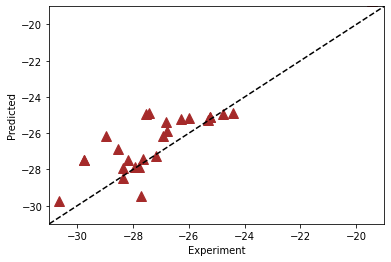

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(-31,-16,1)
y = x 

plt.plot(Y_test,Y_pred,linestyle='none',marker='^',ms=10,color='brown')
plt.plot(x,y,linestyle='--',color='black')
plt.xlim(-31,-19)
plt.ylim(-31,-19)
plt.xlabel('Experiment')
plt.ylabel('Predicted')
plt.show()

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

print(rf.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


In [ ]:
#ccp_alpha = []
criterion = ['mse','mae']
max_depth = [int(x) for x in np.arange(2,30,1)]
max_features = ['auto','sqrt','log2']
max_leaf_nodes = [int(x) for x in np.arange(2,10,1)]
min_samples_leaf = [int(x) for x in np.arange(2,10,1)]
n_estimators = [int(x) for x in np.arange(50,1001,10)]

param_grid = {'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features, 'max_leaf_nodes':max_leaf_nodes,
              'min_samples_leaf':min_samples_leaf, 'n_estimators':n_estimators}

rs_cv = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,n_iter=100,n_jobs =-1,cv=10,random_state=512021,return_train_score=True)
rs_cv.fit(X_train,Y_train)
print(rs_cv.best_params_)

{'n_estimators': 920, 'min_samples_leaf': 4, 'max_leaf_nodes': 9, 'max_features': 'auto', 'max_depth': 14, 'criterion': 'mse'}


In [ ]:
rf = RandomForestRegressor(n_estimators=920, min_samples_leaf=4, max_leaf_nodes=9, max_features='auto', max_depth=14, criterion='mse',
                           random_state=42,bootstrap=True)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

In [ ]:
print('RMSE = ' + str(np.sqrt(mean_squared_error(Y_test,Y_pred))))
print('R2 = ' + str(r2_score(Y_test,Y_pred)))

RMSE = 1.0708673807841498
R2 = 0.8986878632027816


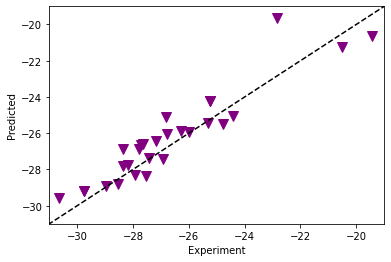

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(-32,-16,1)
y=x
plt.plot(Y_test,Y_pred,linestyle='none',marker='v',ms=10,color='purple')
plt.plot(x,y,linestyle='--',color='black')
plt.xlim(-31,-19)
plt.ylim(-31,-19)
plt.xlabel('Experiment')
plt.ylabel('Predicted')
plt.show()

# **Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

print(gb.get_params)

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

alpha = [x for x in np.arange(0.05,5.0,0.01)]
criterion = ['friedman_mse', 'mse', 'mae']
learning_rate = [x for x in np.arange(0.01,0.95,0.001)]
loss = ['ls', 'lad', 'huber', 'quantile']
max_depth = [int(x) for x in np.arange(2,40,1)]
max_leaf_nodes = [int(x) for x in np.arange(2,20,1)]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [int(x) for x in np.arange(2,5,1)]
tol = [x for x in np.arange(0.0001,0.01,0.00001)]
n_estimators = [int(x) for x in np.arange(50,1001,50)]

param_grid = { 'alpha':alpha, 'criterion':criterion, 'learning_rate':learning_rate, 'loss':loss, 'max_depth':max_depth,
              'max_leaf_nodes':max_leaf_nodes, 'max_features':max_features, 'min_samples_split':min_samples_split,
              'tol':tol, 'n_estimators':n_estimators}

rs_cv = RandomizedSearchCV(estimator = gb, param_distributions = param_grid, cv = 10, n_iter =100,n_jobs = -1, random_state = 612021, 
                           return_train_score=True )
rs_cv.fit(X_train,Y_train)
print(rs_cv.best_params_)

{'tol': 0.00507, 'n_estimators': 500, 'min_samples_split': 2, 'max_leaf_nodes': 12, 'max_features': 'log2', 'max_depth': 3, 'loss': 'lad', 'learning_rate': 0.06499999999999995, 'criterion': 'mae', 'alpha': 0.7800000000000001}


In [ ]:
gb = GradientBoostingRegressor(tol= 0.00507, n_estimators=500, min_samples_split= 2, max_leaf_nodes= 12, max_features= 'log2', max_depth= 3, 
                               loss= 'lad', learning_rate= 0.06499999999999995, criterion= 'mae', alpha= 0.7800000000000001)

gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 = ' + str(r2_score(Y_test,Y_pred)))
print('RMSE = ' + str(np.sqrt(mean_squared_error(Y_test,Y_pred))))

R2 = 0.9199877889866995
RMSE = 0.9516627886153783


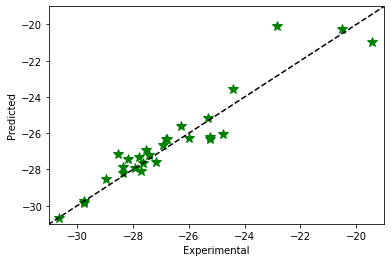

In [ ]:
import matplotlib.pyplot as plt 

x = np.arange(-32,-16,1)
y = x

plt.plot(Y_test,Y_pred, linestyle='none', marker= '*', ms =10, color='green')
plt.plot(x,y,linestyle='--',color='black')
plt.xlim(-31,-19)
plt.ylim(-31,-19)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.show()

# **Xtreme Gradient Boosting Regression**

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

print(xgb.get_params)

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>


In [ ]:
booster = ['gbtree', 'gblinear', 'dart']
gamma = [x for x in np.arange(0.01,100,0.5)]
learning_rate = [x for x in np.arange(0.0001,0.01,0.00001)]
max_depth = [int(x) for x in np.arange(1,100,1)]
n_estimators = [int(x) for x in np.arange(10,10001,10)]
objective = ['reg:linear', 'reg:squarederror']


param_grid = {'booster':booster, 'gamma':gamma, 'learning_rate':learning_rate, 'max_depth':max_depth, 
              'n_estimators':n_estimators, 'objective':objective}

rs_cv = RandomizedSearchCV(estimator = xgb, param_distributions=param_grid, n_iter=100,n_jobs = -1, cv=10, random_state=612021,return_train_score=True)
rs_cv.fit(X_train,Y_train)
print(rs_cv.best_params_)

{'objective': 'reg:squarederror', 'n_estimators': 5120, 'max_depth': 87, 'learning_rate': 0.00994, 'gamma': 0.51, 'booster': 'gbtree'}


In [ ]:
xgb= XGBRegressor(objective= 'reg:squarederror', n_estimators=5120, max_depth=87, learning_rate=0.00994, gamma=0.51, booster='gbtree')
xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)

In [ ]:
print('R2 = ' + str(r2_score(Y_test,Y_pred)))
print('RMSE = ' + str(mean_squared_error(Y_test,Y_pred)))

R2 = 0.9529414378519367
RMSE = 0.5326581274052303


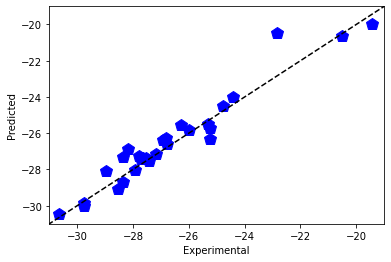

In [ ]:
x = np.arange(-32,-16,1)
y = x

plt.plot(Y_test,Y_pred, linestyle='none', marker= 'p', ms =12, color='blue')
plt.plot(x,y,linestyle='--',color='black')
plt.xlim(-31,-19)
plt.ylim(-31,-19)
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.show()